In [1]:
# TODO: Add any necessary import/download statements here
import exercise_2
import nltk
nltk.download('webtext')
from nltk.corpus import webtext

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Sadaf\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


## Exercise 2 (7 = 4+0.5+1+0.5+1 points)

The following cell executes the function `analysis` from the `exercise_2.py` file. You are given a tokenized input (list of words). 

1. Plot the frequencies against rank for the inputs (different languages) along with an 'ideal' curve according to the Zipf's law. Use the log-log scale. (4 = (1 *4) points)

Then, answer the following questions and elaborate:

2. Does Zipf's law form an accurate prediction of your data? (0.5 point)
3. What are the differences between the languages? What causes them? (1 point)
4. In your plot, what causes the vertical gaps ("steps") for high-rank words  (rightmost)? (0.5 point)
5. Zipf's law "predicts" the frequency of the n-th rank word. Compute the mean squared error of these predictions $\big(\frac{1}{n} \sum (\hat{y} - y)^2\big)$, and output the value to 10 decimal digits. (1 point)

Please extend `exercise_2.py`. Ideally the following cell remains unchanged and outputs your code. If you make changes, please comment on why it was necessary.

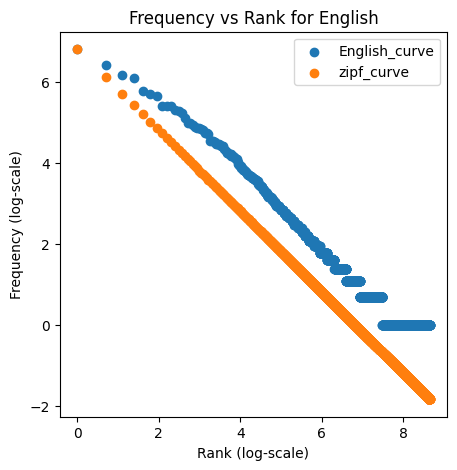

MSE for English text : 85.2197340616


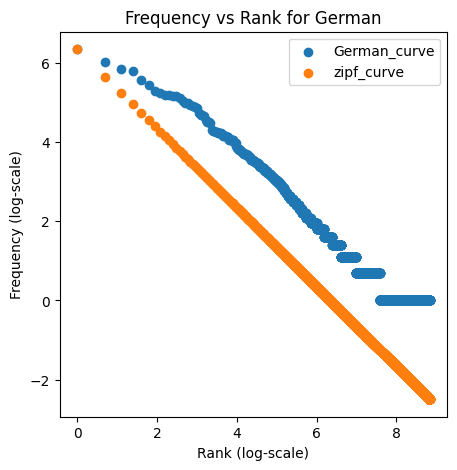

MSE for German text : 72.4773407936


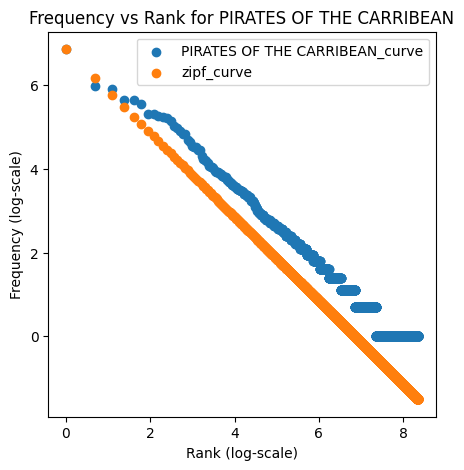

MSE for PIRATES OF THE CARRIBEAN text : 37.8163297495


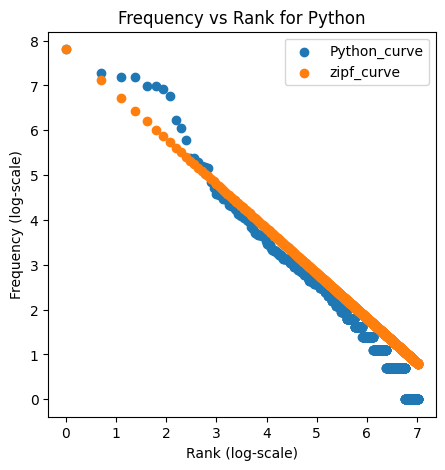

MSE for Python text : 2193.1808370991


In [2]:
import tokenize
from importlib import reload
exercise_2 = reload(exercise_2)

# run on English text
with open("data/macbeth_en.txt", "r", encoding = 'utf-8') as f:
    exercise_2.analysis("English", f.read().lower().split())

# run on German text
with open("data/macbeth_de.txt", "r") as f:
    exercise_2.analysis("German", f.read().lower().split())

# run on PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST
# TODO: Use NLTK's corpora for loading this text
# and call the function as done above

exercise_2.analysis("PIRATES OF THE CARRIBEAN", webtext.raw('pirates.txt').lower().split())

# Run on Transformer's trainer module's source code
with open("data/trainer.py", "r") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    exercise_2.analysis("Python", tokens)

#### Answers

2.1) Each plot is provided above.

2.2) Zipf's law seems to predict the natural trends in our frequency vs rank graph, specially in the middle region i.e. for words having near about average rank.

2.3) Zipf curve for Pirates of the Caribbean is very close to the actual observations whereas the Zipf curve for German is the least close to the actual observations out of all the languages. These differences might have been caused due to the different language structures, corpus sizes and vocabulary sizes. Pirates of the Caribbean has a very limited vocabulary size as compared to German, so there will be less deviations from the Zipf's Law in case of Pirates of the Caribbean.

2.4) There are a lot of words in the given text that do not occur frequently, specially the words with low rank. These words tend to have similar frequency in the text, thereby a similar log value. This leads to the formation of the "steps".

2.5) Mentioned below each plot

# Bonus (2 point)

Repeat exercise 2 but run these two experiments (independent of each other):
 - Don't lowercase anything
 - Use character level tokenization, rather than word level

Please write your own loader similar to the one we provided. For this, you may create a file `bonus.py` and import your code from there in a similar fashion to the above questions.

In [3]:
import bonus

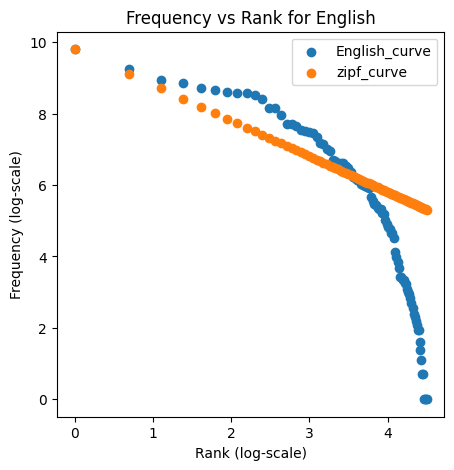

MSE for English text : 1034726.1410415110


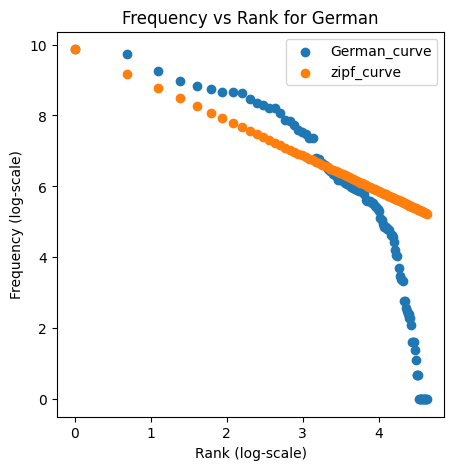

MSE for German text : 1678472.2464213178


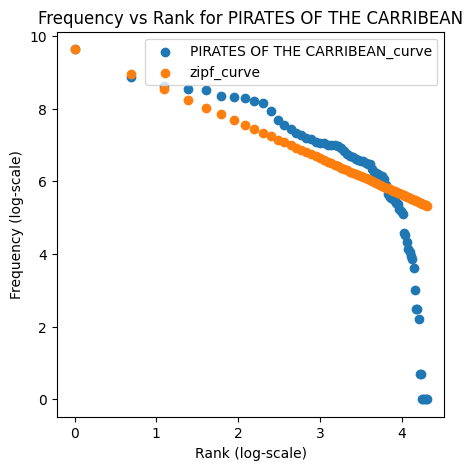

MSE for PIRATES OF THE CARRIBEAN text : 440055.5063257571


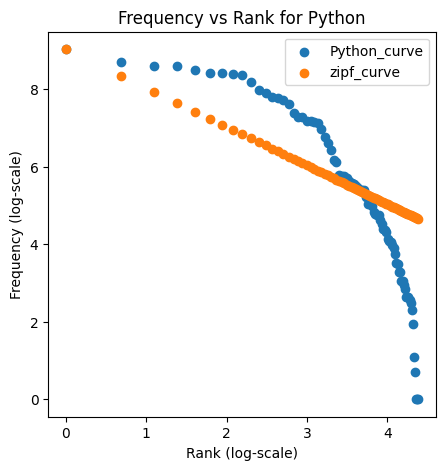

MSE for Python text : 1410258.3690141644


In [4]:
import nltk
import tokenize
from importlib import reload
bonus = reload(bonus)

# run on English text
with open("data/macbeth_en.txt", "r", encoding='utf-8') as f:
    bonus.analysis("English", list(f.read()))

# run on German text
with open("data/macbeth_de.txt", "r") as f:
    bonus.analysis("German", list(f.read()))

# run on PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST
pirates = nltk.corpus.webtext.raw('pirates.txt')
bonus.analysis("PIRATES OF THE CARRIBEAN", list(pirates))

# Run on Transformer's trainer module's source code
with open("data/trainer.py", "r") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    bonus.analysis("Python", list(''.join(tokens)))
